prepare library

In [668]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

references:
- https://towardsdatascience.com/community-detection-algorithms-9bd8951e7dae
- https://medium.com/@marcosacj/creating-and-visualizing-a-complex-network-of-instagram-hashtags-based-on-posts-about-politics-2daf24f31088
- https://github.com/marcosacj/cna-instagram/blob/master/2019-06-11-1-macj-graph-scratch.ipynb <-- coding contoh pembagian nodes & edges
- https://www.kaggle.com/datasets/arunavakrchakraborty/covid19-twitter-dataset

In [669]:
link_folder = 'write your dataset path here'

setting dataset files

In [670]:
df = pd.read_csv( link_folder+'Covid-19 Twitter Dataset (Apr-Jun 2020).csv' )
# df = pd.read_csv( link_folder+'Covid-19 Twitter Dataset (Apr-Jun 2021).csv' )

# # check unique values from attributes from df
# print( "Unique values from category column: ", sorted( df['hashtags'].unique() ), ", count: ", df['hashtags'].nunique() )

# preview data from file
# df.head()
# df.info()

lets make new columns to divide hashtags and shortening the source column value

In [671]:
# filter data based on hashtags and source value
filtered_df = df.dropna( subset=['hashtags', 'source' ] ).copy()

# create new columns
filtered_df['shorten_source'] = filtered_df['source'].copy()

# rearrange columns
filtered_df = filtered_df[ ['id', 'created_at', 'source', 'shorten_source', 'lang', 'original_text', 'favorite_count', 'retweet_count', 'original_author', 'hashtags', 'user_mentions', 'place', 'clean_tweet', 'compound', 'neg', 'neu', 'pos', 'sentiment'] ]

# preview filtered data
print( "origin data number: ", df.shape )
print( "filtered data number: ", filtered_df.shape )

origin data number:  (143903, 17)
filtered data number:  (28500, 18)


In [672]:
filtered_df.sample( 5 )

,id,created_at,source,shorten_source,lang,original_text,favorite_count,retweet_count,original_author,hashtags,user_mentions,place,clean_tweet,compound,neg,neu,pos,sentiment
115565,1.260000e+18,2020-05-24,"<a href=""https://mobile.twitter.com"" rel=""nofo...","<a href=""https://mobile.twitter.com"" rel=""nofo...",en,"RT @azam_brazdh: #Iran #news in brief, Apr11, ...",0.0,0.0,Sarbaze_iran18,"Iran, news, Covid_19, CoronaVirus, 1988Massacre","azam_brazdh, YouTube",NaN,brief apr via,0.0000,0.000,1.000,0.0,neu
67759,1.260000e+18,2020-05-09,"<a href=""https://mobile.twitter.com"" rel=""nofo...","<a href=""https://mobile.twitter.com"" rel=""nofo...",en,RT @RanjitSinghR2: #TrueBloodPump\nCovid 19\n@...,0.0,3.0,Sahilsroay4,TrueBloodPump,"RanjitSinghR2, derasachasauda, Gurmeetramrahim",NaN,covid19 ji hatt saint dr msg piou divin guidan...,0.0000,0.000,1.000,0.0,neu
41039,1.260000e+18,2020-05-03,"<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...",en,RT @oil_shaeikh: Innalillahi wa inna ilayhi ra...,0.0,2507.0,naseer_gk,COVID__19,oil_shaeikh,Land of Equity,innalillahi wa inna ilayhi rajiuun lost grandm...,-0.5423,0.290,0.710,0.0,neg
92784,1.260000e+18,2020-05-15,"<a href=""http://twitter.com/download/android"" ...","<a href=""http://twitter.com/download/android"" ...",en,"RT @newvisionwire: Ronnie Kaye, 28, says he wa...",0.0,92.0,Six2pipo,COVID19,newvisionwire,"Kampala, Uganda",ronni kay say walk semuto luweero kampala crea...,0.0000,0.000,1.000,0.0,neu
29420,1.260000e+18,2020-04-30,"<a href=""https://mobile.twitter.com"" rel=""nofo...","<a href=""https://mobile.twitter.com"" rel=""nofo...",en,Everyone is hurting for cash right now.\n #COV...,0.0,0.0,TheRobMccurry,"COVID__19, makingmoney, cartoon, sunflower, fa...",NaN,"Gulfport, MS",everyon hurt cash right,-0.5267,0.531,0.469,0.0,neg


In [673]:
def remove_delimiter_from_source_link( input_text ):
    curr_values = str( input_text ).split( ">" )
    curr_values = curr_values[ 1 ].split( "<" )
    return curr_values[0]
# end func

# # test function by using unique values from all data
# list_sources_values = filtered_df['source'].unique().copy()
# list_sources_values = [ remove_delimiter_from_source_link( val ) for val in list_sources_values ]
# print( "len filtered source: ", len( list_sources_values ) )
# list_sources_values

# get string value only from source value
filtered_df['shorten_source'] = [ remove_delimiter_from_source_link( val ) for val in filtered_df['source'] ]

# check current dataframe values
filtered_df.sample( 5 )

,id,created_at,source,shorten_source,lang,original_text,favorite_count,retweet_count,original_author,hashtags,user_mentions,place,clean_tweet,compound,neg,neu,pos,sentiment
20458,1.260000e+18,2020-04-28,"<a href=""http://twitter.com/download/android"" ...",Twitter for Android,en,RT @StateReporter: #JammuKashmir\n\n#COVID19 \...,0.0,13.0,Ayoubdar9,"JammuKashmir, COVID19, More, Positive","StateReporter, diprjk, PIBSrinagar, DivComKash",NaN,test covid19 talli mount,0.0000,0.000,1.000,0.000,neu
109059,1.260000e+18,2020-05-23,"<a href=""http://twitter.com/download/android"" ...",Twitter for Android,en,RT @GreenPartyMolly: .@MishalHusain \n\nHundre...,0.0,0.0,SimonBate7,Covid_19,"GreenPartyMolly, MishalHusain","Edinburgh, Scotland",hundr peopl infect face realli difficult probl...,-0.6369,0.426,0.574,0.000,neg
51916,1.260000e+18,2020-05-05,"<a href=""http://twitter.com/download/android"" ...",Twitter for Android,en,#BREAKING\n\nMassive spike again today!! \n\n5...,0.0,65.0,Jay_Apoorva18,"BREAKING, COVID, Corona",NaN,"Chennai, India",massiv spike today new case tamilnadu total nu...,0.0772,0.000,0.874,0.126,pos
72553,1.260000e+18,2020-05-09,"<a href=""http://twitter.com/download/android"" ...",Twitter for Android,en,If the @premierleague plays a @realDonaldTrump...,0.0,0.0,d_mitali,Covid_19,"premierleague, realDonaldTrump",kigali,play one question conspiraci th,0.3400,0.000,0.625,0.375,pos
32134,1.260000e+18,2020-05-01,"<a href=""http://twitter.com/download/iphone"" r...",Twitter for iPhone,en,One more step to beat COVID-19 by following si...,0.0,3.0,tdoanand,GujaratFoundationDay,NaN,NaN,one step beat covid19 follow simpl three rule let,0.0000,0.000,1.000,0.000,neu


In [674]:
# normalize hashtags value with lowercase
filtered_df['hashtags'] = filtered_df['hashtags'].str.lower()

# check current dataframe values
filtered_df.sample( 5 )

,id,created_at,source,shorten_source,lang,original_text,favorite_count,retweet_count,original_author,hashtags,user_mentions,place,clean_tweet,compound,neg,neu,pos,sentiment
46133,1.260000e+18,2020-05-04,"<a href=""http://twitter.com/download/android"" ...",Twitter for Android,en,RT @garry_garvit: Donate for COVID-19 thanks A...,0.0,42209.0,garry_garvit,"iforindia, iforindiaconcert, aamirkhan, covidー19",garry_garvit,"Dehradun, India",donat covid19 thank aamir khan india,0.3612,0.0,0.667,0.333,pos
52685,1.260000e+18,2020-05-05,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Twitter Web App,en,RT @CSCCEUCB: How is #COVID-19 affecting #ECE?...,0.0,14.0,KatieKurutz,"covid, ece, earlyeducators","CSCCEUCB, KQEDForum",L.A. County,affect tune hear marci whitebook talk impac,0.0000,0.0,1.000,0.000,neu
74136,1.260000e+18,2020-05-10,"<a href=""https://about.twitter.com/products/tw...",TweetDeck,en,RT @page36news: BREAKING: Governor @GovWike Pe...,0.0,4162.0,BayoModupe,covid19,"page36news, GovWike",NaN,break governor person supervis demolit two hot...,0.0000,0.0,1.000,0.000,neu
8176,1.250000e+18,2020-04-25,"<a href=""http://twitter.com/download/iphone"" r...",Twitter for iPhone,en,No evidence that recovered COVID-19 patients c...,0.0,328.0,IntelligentMum,covid19,NaN,NaN,evid recov covid19 patient reinfect articl amp...,0.0000,0.0,1.000,0.000,neu
48013,1.260000e+18,2020-05-04,"<a href=""http://twitter.com/download/iphone"" r...",Twitter for iPhone,en,"RT @HealthZA: 4 May 2020\nAs of today, the tot...",0.0,402.0,LoloKale,covid__19,HealthZA,"Pretoria, South Africa",may today total number confirm covid19 case so...,0.0772,0.0,0.860,0.140,pos


In [675]:
# reference: https://www.geeksforgeeks.org/python-remove-non-english-characters-strings-from-list/

def is_english( c ):
    ascii_value = ord( c )
    return ( ascii_value >= 48 and ascii_value <= 57 ) or ( ascii_value >= 65 and ascii_value <= 90 ) or ( ascii_value >= 97 and ascii_value <= 122 ) or ascii_value==32
    # or ascii_value==44 or ascii_value==32
# end func

def remove_non_english( word ):
    english_str = ""
    for one_char in word:
        if is_english( one_char ): english_str += one_char
    # end for

    # return final english string
    return english_str
# end func 

In [676]:
# search = 'पूछता_है_उपेक्षित_आयुर्वेद'
# # search = 'abcde'
# current_str = remove_non_english( search )
# print( 'current_str: ', current_str )
# # if remove_non_english( search )!="": print( "benar" )
# # else: print( "salah" )
# # df['fruit'].isin( fruits_to_check )

# # # filtered_df.loc[ search in filtered_df['hashtags'] ]
# # ( filtered_df['hashtags'].eq( search ) ).any()

# # print( "Unique values from category column: ", sorted( filtered_df['place'].unique() ), ", count: ", filtered_df['place'].nunique() )

In [677]:
# remove words that not writen in alphabet
def remove_words_not_written_in_eng_v1( hashtags_data ):
    # loop each posts hashtags
    for all_hashtags in hashtags_data:
        # split current post hashtags into individual hashtags
        one_posts_hash = all_hashtags.split( ", " )

        # loop tiap hashtags
        for idx, one_hash_tag in enumerate( one_posts_hash ):
            print( "idx: ", idx, ", hash: ", one_hash_tag )
            
            # hanya meloloskan hashtag yg disusun berdasarkan angka dan huruf alphabet, selain itu tidak diloloskan
            # if remove_non_english( hash )!="" and remove_non_english( hash )!=" ": all_hashtags[ idx ] = remove_non_english( hash )
            if remove_non_english( one_hash_tag )!="" and remove_non_english( one_hash_tag )!=" ":
                # print( "benar -->", remove_non_english( one_hash_tag ) )
                print( "benar -->", one_hash_tag )
            else: print( "salah -->", one_hash_tag )
            # end if else
        # end loop
    # end loop
# end func

def remove_words_not_written_in_eng_v2( hashtags_data ):
    all_data = hashtags_data.copy()

    # loop each posts hashtags
    for index_post, all_hashtags in enumerate( all_data ):
        # split current post hashtags into individual hashtags
        one_posts_hash = all_hashtags.split( ", " )

        # loop tiap hashtags
        for idx, one_hash_tag in enumerate( one_posts_hash ):
            # print( "idx: ", idx, ", hash: ", one_hash_tag )
            
            # hanya meloloskan hashtag yg disusun berdasarkan angka dan huruf alphabet, selain itu tidak diloloskan
            if remove_non_english( one_hash_tag )=="" or remove_non_english( one_hash_tag )==" ": one_posts_hash.remove( one_posts_hash[ idx ] )
            # end if else
        # end loop

        # update current available hashtags
        # all_hashtags = ", ".join( one_posts_hash )
        all_data[ index_post ] = ", ".join( one_posts_hash )
    # end loop

    # return final results
    return all_data
# end func

def remove_words_not_written_in_eng_v3( posts_hash ):
    
    # split current post hashtags into individual hashtags
    one_posts_hash = posts_hash.split( ", " )
    
    # loop tiap hashtags
    for idx, one_hash_tag in enumerate( one_posts_hash ):
        # hanya meloloskan hashtag yg disusun berdasarkan angka dan huruf alphabet, selain itu tidak diloloskan
        if remove_non_english( one_hash_tag )=="" or remove_non_english( one_hash_tag )==" ": one_posts_hash.remove( one_posts_hash[ idx ] )

        # change short mark with another mark
        if one_hash_tag.find( 'ー' ) != -1: one_hash_tag.replace( "ー", "-" )
        # end if else
    # end loop

    # return final results
    return ", ".join( one_posts_hash )
# end func

# filtered_df['hashtags'] = [ remove_words_not_written_in_eng_v3( val ) for val in filtered_df['hashtags'] ]
# # filtered_df['hashtags']

In [678]:
# check current dataframe values
filtered_df.sample( 5 )

,id,created_at,source,shorten_source,lang,original_text,favorite_count,retweet_count,original_author,hashtags,user_mentions,place,clean_tweet,compound,neg,neu,pos,sentiment
97204,1.260000e+18,2020-05-16,"<a href=""https://periscope.tv"" rel=""nofollow"">...",Periscope,en,Watch @Dutyron's broadcast: #Covid-19 check in...,0.0,50.0,Alone54718379,"covid, newyork, pandemic, dutyron",Dutyron,Everywhere You're Not!,watch broadcast check,0.0000,0.000,1.000,0.000,neu
51194,1.260000e+18,2020-05-05,"<a href=""https://www.hootsuite.com"" rel=""nofol...",Hootsuite Inc.,en,"110,000 small businesses applied for a #Bounce...",0.0,0.0,HollandHarper1,bounceback,NaN,"Battle, England",small busi appli loan day learn stori dedic covi,0.0000,0.000,1.000,0.000,neu
37373,1.260000e+18,2020-05-02,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Twitter Web App,en,2 May: Coronavirus in #Germany Update\n\nToday...,0.0,42.0,stat_world,germany,NaN,"Palo Alto, CA",may coronaviru updat today infect death total ...,-0.5574,0.320,0.574,0.107,neg
19027,1.250000e+18,2020-04-27,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Twitter Web App,en,RT @Medscape: The first case of #COVID-19 init...,0.0,11.0,DraDominguez_,covid,Medscape,"Cuernavaca, Morelos",first case initi present acut guillain barr sy...,0.0000,0.000,1.000,0.000,neu
100410,1.260000e+18,2020-05-19,"<a href=""http://twitter.com/download/iphone"" r...",Twitter for iPhone,en,@InstituteGC @adamboultonSKY For TB &amp; his ...,0.0,0.0,RobertMcAlay,covid,"InstituteGC, adamboultonSKY",United Kingdom,tb institut suggest earli warn model laughabl,-0.1027,0.189,0.811,0.000,neg


In [679]:
hashtags_on_posts = filtered_df['hashtags'].unique().copy()
number_current_hastags_pairs = filtered_df['hashtags'].nunique()
# print( "all hashtags on posts: ", hashtags_on_posts )
print( "all hashtags number: ", number_current_hastags_pairs )

# get list of one hashtags from posts
def get_hashtags_list( posts ):
  # initial value
  final_list_tags = []
  final_list_posts = []

  # loop tiap satu data dari hashtags, misal limit dulu ke 1000 post
  for all_hashtags in posts:
    # divide hashtags into one list
    array_hashtags = all_hashtags.lower().split( ", " )

    # save current hastags list from one post
    final_list_posts.append( array_hashtags )
    
    # loop tiap hashtags
    for hash in array_hashtags:
      # normalsasi penulisan hashtags dalam bentuk lowercase untuk meminimalkan data double
      selected_word = hash.lower()
      
      # hanya meloloskan hashtag yg disusun berdasarkan angka dan huruf alphabet, selain itu tidak diloloskan
      if selected_word not in final_list_tags and remove_non_english( selected_word )!="": final_list_tags.append( selected_word )
    # end loop
  # end loop

  # return final list
  return final_list_tags, final_list_posts
# end function

# testing function
# varitions_of_hashtags, list_of_hashtags_from_each_post = get_hashtags_list( hashtags_on_posts[0:100] ) 
varitions_of_hashtags, list_of_hashtags_from_each_post = get_hashtags_list( hashtags_on_posts ) 
print( 'banyak jenis hashtags setelah digabung: ', len( varitions_of_hashtags ) )
print( 'banyak posts: ', len( list_of_hashtags_from_each_post ) ) 

all hashtags number:  15211
banyak jenis hashtags setelah digabung:  14412
banyak posts:  15211


In [680]:
# varitions_of_hashtags

In [681]:
# limit the processed data
max_data = 5000

In [682]:
# select data where post using more than one hashtags
selected_hash = [ one_post.split( ", " ) for one_post in filtered_df['hashtags'][:max_data] if len( one_post.split( ", " ) ) > 1 ]
print( "before hash spelling in eng checked: ", len( selected_hash ) )

before hash spelling in eng checked:  2042


In [683]:
# initialize edge pair results
edge_pair_list_all = []
edge_pair_list_keys = []

# create tuple only when a post has more than one hashtags
for hashtags_from_one_post in selected_hash:
    for i in range( len( hashtags_from_one_post ) ):
        for j in range( i+1, len( hashtags_from_one_post ) ):
            one_pair = ( hashtags_from_one_post[ i ], hashtags_from_one_post[ j ] )
            edge_pair_list_all.append( one_pair )
            if one_pair not in edge_pair_list_keys:
                edge_pair_list_keys.append( one_pair )
            # end if
        # end loop of j
    # end loop of i
# end loop of selected hash

# check current dataframe values
# print( "before: ", selected_hash )
# print( "after: ", edge_pair_list_all )
# print( "after: ", edge_pair_list_keys )
print( "len edge pair all: ", len( edge_pair_list_all ) )
print( "len edge pair keys: ", len( edge_pair_list_keys ) )

len edge pair all:  7007
len edge pair keys:  5935


In [684]:
# try to create graph from created edge list all
import networkx as nx
G = nx.from_edgelist( edge_pair_list_all )

# check current dataframe values
# print( "current available nodes: ", list( G.nodes ) )
# print( "current available edges: ", list( G.edges() ) )
print( "current available nodes: ", len( G.nodes ) )
print( "current available edges: ", len( G.edges() ) )


current available nodes:  2662
current available edges:  5701


In [685]:
# counting edges based from created edge list all
import pandas as pd

In [686]:
# set all edge pair into new dataframe
df_edges_list = pd.DataFrame( edge_pair_list_all, columns=['source', 'target'] )

# check current dataframe values
# df_edges_list.sample( 5 )
df_edges_list

,source,target
0,oic,islamophobic
1,oic,india
2,oic,covid
3,islamophobic,india
4,islamophobic,covid
...,...,...
7002,jypentertainment,twice
7003,ecommerce,covidー19
7004,ecommerce,staysafenigeria
7005,covidー19,staysafenigeria


In [687]:
# search = 'पूछता_है_उपेक्षित_आयुर्वेद'
# df_edges_list.loc[ df_edges_list['source']==search ]

In [688]:
# df_edges_list.loc[ df_edges_list['target']==search ]


In [689]:
# import to new file csv
df_edges_list.to_csv( link_folder+'edges_list_all_'+str( max_data )+'.csv', index=False )

In [690]:
# set new column for each hashtags pair
df_edges_list['tuple'] = pd.Series( zip( df_edges_list['source'], df_edges_list['target'] ) )

In [691]:
# check current dataframe values
df_edges_list.sample( 5 )

,source,target,tuple
1221,datalake,ai,"(datalake, ai)"
5695,covid_19,coronavirus,"(covid_19, coronavirus)"
3492,tiktok,plandemic,"(tiktok, plandemic)"
1093,coronavirus,coronavirusupdates,"(coronavirus, coronavirusupdates)"
5990,zoom,quarantine,"(zoom, quarantine)"


In [692]:
# group each tuple to be used as edge weight
grouped_edges_list = df_edges_list.groupby( 'tuple' ).count()

# check current dataframe values
grouped_edges_list.head( 5 )

,source,target
tuple,,
"(199bn, crpf)",1,1
"(1u, disinfectants)",1,1
"(1u, notmeus)",1,1
"(2019ncov, apfightscorona)",1,1
"(2019ncov, who)",1,1


In [693]:
# drop one column either source or target since both of attribute has same values
grouped_edges_list.drop( columns='target', inplace=True, errors='ignore' )

# rename column
grouped_edges_list.columns = ['weight']
grouped_edges_list.reset_index( inplace=True )

# check current dataframe values
grouped_edges_list.sample( 5 )
# grouped_edges_list.shape

,tuple,weight
1521,"(covid_19, aacr)",1
4941,"(singers, writers)",1
5222,"(stltesting, covidtestingstlouis)",1
567,"(canoneosrebelt6, zoom)",1
273,"(aws, ai)",1


In [694]:
# add new column source and target
grouped_edges_list[ 'source' ] = grouped_edges_list['tuple'].str[0]
grouped_edges_list[ 'target' ] = grouped_edges_list['tuple'].str[1]

# drop tuple column
grouped_edges_list = grouped_edges_list.drop( columns='tuple' )

# rearrange columns order
grouped_edges_list = grouped_edges_list[ ['source', 'target', 'weight'] ]

# check current dataframe values
grouped_edges_list.sample( 5 )

,source,target,weight
70,age,aging,1
4973,social_distancing,socialdistancing,1
4770,sathdokharagpur,stayhome,1
2815,hamidmir,supportsmallstreamers,1
4303,plandemic,socialmedia,1


In [695]:
# import to new file csv
grouped_edges_list.to_csv( link_folder+'edges_weight_counted_'+str( max_data )+'.csv', index=False )

In [696]:
check_edges_with_weight_more_than_one = grouped_edges_list[ grouped_edges_list['weight'] > 2 ]
check_edges_with_weight_more_than_one.sample( 5 )

,source,target,weight
1641,covid_19,covidiots,3
2946,hydroxychloroquine,covid19,3
5150,stayhomesavelives,covid_19,4
271,awaninews,englishnews,4
5909,पूछता_है_उपेक्षित_आयुर्वेद,ayurved,3


In [697]:
check_edges_with_weight_more_than_one.shape

(184, 3)

In [698]:
grouped_edges_list['weight'].max()

61

testing code from chatgpt

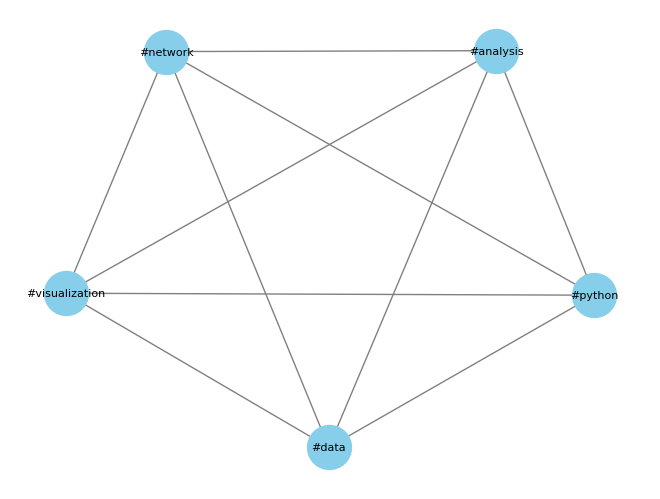

In [699]:
import networkx as nx
import matplotlib.pyplot as plt

# Example data: List of tuples where each tuple contains hashtags from a tweet
tweet_hashtags = [
    ['#data', '#visualization', '#network'],
    ['#network', '#analysis', '#python'],
    ['#data', '#python', '#analysis'],
    ['#visualization', '#python', '#network'],
    ['#data', '#analysis', '#visualization']
]

# Create a graph
G = nx.Graph()

# Add nodes and edges based on hashtag co-occurrence
for hashtags in tweet_hashtags:
    G.add_nodes_from(hashtags)
    G.add_edges_from([(hashtags[i], hashtags[j]) for i in range(len(hashtags)) for j in range(i + 1, len(hashtags))])

# Visualization
pos = nx.spring_layout(G)  # or use another layout algorithm
nx.draw(G, pos, with_labels=True, font_size=8, node_size=1000, font_color='black', node_color='skyblue', edge_color='gray')
# plt.show()


new graph from created edges group

In [700]:
# open saved edges data file
df_edge_grouped = pd.read_csv( link_folder+'edges_weight_counted_'+str( max_data )+'.csv' )
new_graph = nx.from_pandas_edgelist( df_edge_grouped, edge_attr=True )

# check nodes and edges number from saved file
print( "nodes: ", len( new_graph.nodes ) )
print( "edges: ", len( new_graph.edges ) )

nodes:  2662
edges:  5701


In [701]:
list( new_graph.nodes )[:10]

['199bn',
 'crpf',
 '1u',
 'disinfectants',
 'notmeus',
 '2019ncov',
 'apfightscorona',
 'who',
 '25_april',
 'عهد_الانهيار']

In [702]:
list( new_graph.edges( data=True ) )[:10]

[('199bn', 'crpf', {'weight': 1}),
 ('1u', 'disinfectants', {'weight': 1}),
 ('1u', 'notmeus', {'weight': 1}),
 ('1u', 'coronavirus', {'weight': 1}),
 ('1u', 'covid_19', {'weight': 1}),
 ('1u', 'disinfectant', {'weight': 1}),
 ('1u', 'resist', {'weight': 1}),
 ('1u', 'stayhome', {'weight': 1}),
 ('1u', 'ultraviolet', {'weight': 1}),
 ('disinfectants', 'americans', {'weight': 1})]

C:\Users\medin\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2346 (\N{DEVANAGARI LETTER PA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\medin\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\medin\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2370 (\N{DEVANAGARI VOWEL SIGN UU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\medin\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2331 (\N{DEVANAGARI LETTER CHA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\medin\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2340 (\N{DEVANAGARI LETTER TA}) 

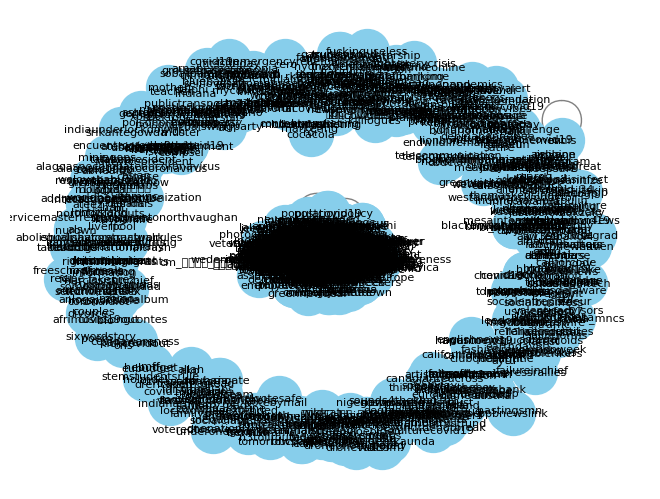

In [703]:
# Visualization
pos = nx.spring_layout( new_graph )  # or use another layout algorithm
nx.draw( new_graph, pos, with_labels=True, font_size=8, node_size=1000, font_color='black', node_color='skyblue', edge_color='gray')
plt.show()